In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob
import subprocess

In [2]:
limits = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]

In [3]:
len(limits)

21

In [4]:
list_of_lines[14] 

NameError: name 'list_of_lines' is not defined

In [89]:
for i in range(len(limits)):
    
    with open("EVCS_15_F.gms","r") as f:
        list_of_lines = f.readlines()
        
    
    list_of_lines[14] = "grid_limit 'Desired max power from grid kW' /" + str(limits[i]) + "/\n"
    
    print(list_of_lines[14])
    
    with open("EVCS_15_F.gms", "w") as f:
        f.writelines(list_of_lines)
        
    subprocess.run(["gams", "EVCS_15_F.gms", "logOption", "2"])
    
    subprocess.run(["move", "EVCS_15_F_results.db", "EVCS_15_F_M1_results_" + str(limits[i]) + ".db"], shell = True)
    
    print(limits[i])

grid_limit 'Desired max power from grid kW' /100/

100
grid_limit 'Desired max power from grid kW' /110/

110
grid_limit 'Desired max power from grid kW' /120/

120
grid_limit 'Desired max power from grid kW' /130/

130
grid_limit 'Desired max power from grid kW' /140/

140
grid_limit 'Desired max power from grid kW' /150/

150
grid_limit 'Desired max power from grid kW' /160/

160
grid_limit 'Desired max power from grid kW' /170/

170
grid_limit 'Desired max power from grid kW' /180/

180
grid_limit 'Desired max power from grid kW' /190/

190
grid_limit 'Desired max power from grid kW' /200/

200
grid_limit 'Desired max power from grid kW' /210/

210
grid_limit 'Desired max power from grid kW' /220/

220
grid_limit 'Desired max power from grid kW' /230/

230
grid_limit 'Desired max power from grid kW' /240/

240
grid_limit 'Desired max power from grid kW' /250/

250
grid_limit 'Desired max power from grid kW' /260/

260
grid_limit 'Desired max power from grid kW' /270/

270
grid_limit

In [5]:
#Extract result data from all result databases and create dataframes for each variable

grid_p = pd.DataFrame()
grid_ex_p = pd.DataFrame()
grid_tot_p = pd.DataFrame()

soc_pen = pd.DataFrame()

grid_e = pd.DataFrame()
grid_ex_e = pd.DataFrame()

ESS_lvl = pd.DataFrame()
ESS_p = pd.DataFrame()

sclrs = pd.DataFrame()

for filename in glob.glob('EVCS_15_F_M1_results*.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    scalars =  pd.read_sql_query('SELECT * FROM scalarvariables', con)
    
    soc_penalty = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)
    
    con.close()
    
    grid_p[filename[21:-3]] = grid_power['level'].copy()
    grid_ex_p[filename[21:-3]] = grid_extra_power['level'].copy()
    grid_tot_p[filename[21:-3]] = grid_total_power['level'].copy()
    
    grid_e[filename[21:-3]] = grid_energy['level'].copy()
    grid_ex_e[filename[21:-3]] = grid_extra_energy['level'].copy() 
    
    ESS_lvl[filename[21:-3]] = ESS_level['level'].copy()
    ESS_p[filename[21:-3]] = ESS_power['level'].copy()  
    
    sclrs[filename[21:-3]] = scalars['level'].copy()
    
    soc_pen[filename[21:-3]] = soc_penalty['level'].copy()



In [6]:
sclrs

,100,110,120,130,140,150,160,170,180,190,...,210,220,230,240,250,260,270,280,290,300
0,171.901639,173.253333,178.845703,183.762695,188.637509,193.529046,195.117328,193.500000,173.968750,172.190000,...,175.846584,176.560000,171.700000,171.901639,171.901639,171.901639,169.125278,169.125278,169.125278,169.125278
1,224.658361,223.306667,217.714297,212.797305,207.922491,203.030954,201.442672,203.060000,222.591250,224.370000,...,220.713416,220.000000,224.860000,224.658361,224.658361,224.658361,227.434722,227.434722,227.434722,227.434722
2,265.601270,265.082220,262.934750,261.046625,259.174696,257.296346,256.686446,257.307500,264.807500,265.490540,...,264.086412,263.812460,265.678700,265.601270,265.601270,265.601270,266.667393,266.667393,266.667393,266.667393
3,181.058361,180.366293,177.503000,174.985500,172.489595,169.985128,169.192432,170.000000,180.000000,180.910720,...,179.038549,178.673280,181.260000,181.058361,181.058361,181.058361,183.834722,183.834722,183.834722,183.834722
4,227.568361,226.216667,220.624297,215.707305,210.832491,205.940954,204.352672,205.970000,225.501250,227.280000,...,223.623416,222.910000,227.770000,227.568361,227.568361,227.568361,230.344722,230.344722,230.344722,230.344722
5,30254.688525,30492.586667,31476.843750,32342.234375,33200.201649,34061.112179,34340.649775,34056.000000,30618.500000,30305.440000,...,30948.998735,31074.560000,30219.200000,30254.688525,30254.688525,30254.688525,29766.048889,29766.048889,29766.048889,29766.048889
6,161621.311386,156327.406036,152004.319825,148837.353553,146361.912772,144361.770674,142838.592517,141759.252736,141094.161756,140478.178261,...,139571.224182,139302.541669,139103.451486,138952.822084,138842.452553,138744.622234,138698.437375,138698.437375,138698.437375,138698.437375
7,71448.124503,71047.166352,69812.002439,68742.414573,67696.805209,66659.638897,66304.913158,66607.162424,70553.808901,70902.325674,...,70143.338792,69993.887572,70982.766443,70932.444694,70930.574969,70928.898965,71585.877337,71585.877337,71585.877337,71585.877337
8,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,...,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477,3602.265477
9,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,...,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482,4.283482


In [7]:
#Scalar variables are collected in one DF. In this cell this df is cleaned and sorted

sclrs = sclrs.set_index(scalars['name'])
sclrs1 = sclrs.T
sclrs1['var_ESS_size'] = sclrs1['var_ESS_size'] * 1.25
sclrs1.index = sclrs1.index.astype(int)
sclrs1 = sclrs1.sort_index(ascending = True)
sclrs1['Grid Limit'] = np.array(limits)
sclrs1

name,var_ess_rated_power,var_grid_maxpower1,var_grid_maxpower2,var_grid_maxpower3,var_grid_maxpower4,var_ESS_cost,var_electricity_cost,var_grid_tariff_winter,var_energy_tax,months,var_system_cost,var_ESS_size,Grid Limit
100,171.901639,224.658361,265.601270,181.058361,227.568361,30254.688525,161621.311386,71448.124503,3602.265477,4.283482,280564.464154,171.901639,100
110,173.253333,223.306667,265.082220,180.366293,226.216667,30492.586667,156327.406036,71047.166352,3602.265477,4.283482,273478.656356,173.253333,110
120,178.845703,217.714297,262.934750,177.503000,220.624297,31476.843750,152004.319825,69812.002439,3602.265477,4.283482,267724.483500,178.845703,120
130,183.762695,212.797305,261.046625,174.985500,215.707305,32342.234375,148837.353553,68742.414573,3602.265477,4.283482,263021.617068,183.762695,130
140,188.637509,207.922491,259.174696,172.489595,210.832491,33200.201649,146361.912772,67696.805209,3602.265477,4.283482,259196.613304,188.637509,140
150,193.529046,203.030954,257.296346,169.985128,205.940954,34061.112179,144361.770674,66659.638897,3602.265477,4.283482,256107.256939,193.529046,150
160,195.117328,201.442672,256.686446,169.192432,204.352672,34340.649775,142838.592517,66304.913158,3602.265477,4.283482,253622.710214,195.117328,160
170,193.500000,203.060000,257.307500,170.000000,205.970000,34056.000000,141759.252736,66607.162424,3602.265477,4.283482,251614.979096,193.500000,170
180,173.968750,222.591250,264.807500,180.000000,225.501250,30618.500000,141094.161756,70553.808901,3602.265477,4.283482,250226.077156,173.968750,180
190,172.190000,224.370000,265.490540,180.910720,227.280000,30305.440000,140478.178261,70902.325674,3602.265477,4.283482,249221.574560,172.190000,190


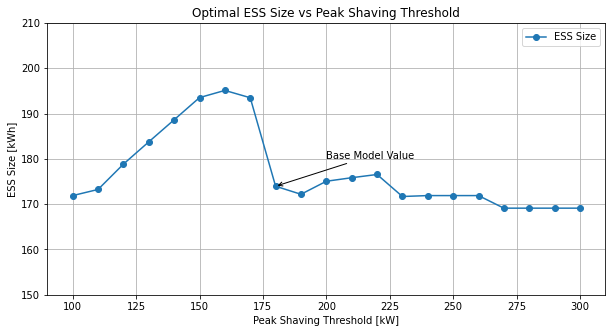

In [9]:
arrowprops = dict(arrowstyle = "->")

y = sclrs1['var_ESS_size']
x = sclrs1['Grid Limit']

m, b = np.polyfit(x, y, 1)

plt.figure(figsize = (10,5))
plt.plot(x, y, 'o-', label = 'ESS Size') 
#plt.plot(x, m*x+b, '-', label = 'Trendline')
plt.annotate('Base Model Value', xy= (x.iloc[8],y.iloc[8]), arrowprops = arrowprops, xytext = (200,180))

plt.legend()
plt.xlabel('Peak Shaving Threshold [kW]')
plt.ylabel('ESS Size [kWh]')
plt.title('Optimal ESS Size vs Peak Shaving Threshold')
plt.ylim(150,210)
plt.grid()

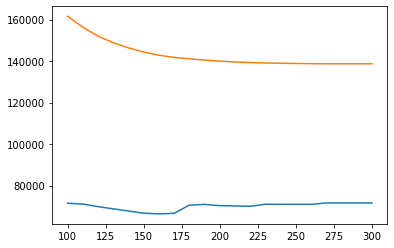

In [23]:
sc = sclrs1['var_system_cost']
gt = sclrs1['var_grid_tariff_winter']
e = sclrs1['var_electricity_cost']
b = sclrs1['var_ESS_cost']

#plt.plot(x,sc)
plt.plot(x,gt)
plt.plot(x,e)
#plt.plot(x,b)

In [15]:
cols = grid_ex_e.columns.tolist()
extra_energy = grid_ex_e[cols].sum(axis=0)

In [16]:
extra_energy

100    7427.309915
110    5613.842122
120    4164.146279
130    3123.928996
140    2304.113881
150    1653.343731
160    1164.992738
170     819.561250
180     637.725208
190     465.276238
200     318.018547
210     212.072961
220     143.109073
230      96.990083
240      60.455495
250      33.745147
260       9.802223
270       0.000000
280       0.000000
290       0.000000
300       0.000000
dtype: float64

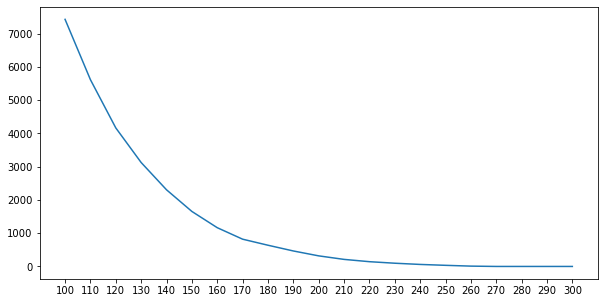

In [22]:
plt.figure(figsize = (10,5))
plt.plot(extra_energy)

In [17]:
penalty = soc_pen[cols].sum(axis=0)

In [18]:
penalty = penalty *0.2
penalty

100    13638.074264
110    12009.231825
120    10829.052009
130     9497.349089
140     8335.428197
150     7422.469713
160     6536.289287
170     5590.298458
180     4357.341021
190     3933.365149
200     3707.819189
210     3465.827089
220     3224.657250
230     2890.403975
240     2777.152935
250     2642.651621
260     2542.847139
270     2320.494324
280     2320.494324
290     2320.494324
300     2320.494324
dtype: float64

In [19]:
costs = pd.DataFrame()
costs['tot'] = sclrs1['var_system_cost']

In [20]:
costs['pen'] = list(penalty)
costs['ex'] = list(extra_energy)
costs['sum'] = costs['tot'] - costs['pen'] - costs['ex']
costs

,tot,pen,ex,sum
100,280564.464154,13638.074264,7427.309915,259499.079976
110,273478.656356,12009.231825,5613.842122,255855.582409
120,267724.483500,10829.052009,4164.146279,252731.285212
130,263021.617068,9497.349089,3123.928996,250400.338982
140,259196.613304,8335.428197,2304.113881,248557.071227
150,256107.256939,7422.469713,1653.343731,247031.443495
160,253622.710214,6536.289287,1164.992738,245921.428189
170,251614.979096,5590.298458,819.561250,245205.119387
180,250226.077156,4357.341021,637.725208,245231.010927
190,249221.574560,3933.365149,465.276238,244822.933173


In [ ]:
plt.plot(costs)

# Battery use and distribution

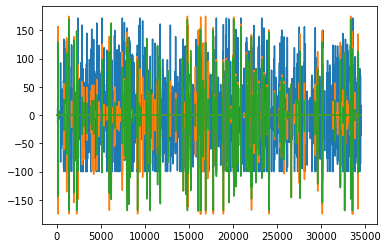

In [99]:
#plt.plot(grid_p['100'])
plt.plot(ESS_p['100'])
plt.plot(ESS_p['200'])
plt.plot(ESS_p['300'])

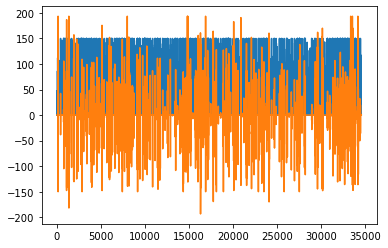

In [100]:
plt.plot(grid_p['150'])
plt.plot(ESS_p['150'])

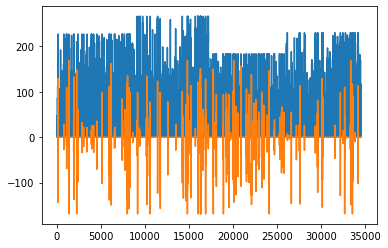

In [101]:
plt.plot(grid_p['300'])
plt.plot(ESS_p['300'])

In [109]:
u = ESS_p.columns.tolist()

In [116]:
battery_1 = ESS_p['100']
battery_2 = ESS_p['200']
battery_3 = ESS_p['300']


discharge_1 = []
charge_1 = []
discharge_2 = []
charge_2 = []
discharge_3 = []
charge_3 = []

for i in range(len(battery_1)):
    if battery_1[i] < 0:
        charge_1.append(battery_1[i])
    elif battery_1[i] > 0:
        discharge_1.append(battery_1[i])
        
for i in range(len(battery_2)):
    if battery_2[i] < 0:
        charge_2.append(battery_2[i])
    elif battery_2[i] > 0:
        discharge_2.append(battery_2[i])
        
for i in range(len(battery_3)):
    if battery_3[i] < 0:
        charge_3.append(battery_3[i])
    elif battery_3[i] > 0:
        discharge_3.append(battery_3[i])
        

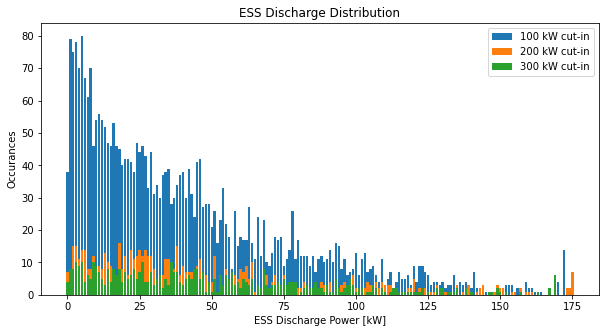

In [117]:
a = [round(num,0) for num in discharge_1]
#a = [round(num,0) for num in battery_1[u]]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names1 = list(aa.keys())
times1 = list(aa.values())

b = [round(num,0) for num in discharge_2]
bb = Counter(b)
bb = dict(bb)
names2 = list(bb.keys())
times2 = list(bb.values())

c = [round(num,0) for num in discharge_3]
cc = Counter(c)
cc = dict(cc)
names3 = list(cc.keys())
times3 = list(cc.values())



plt.figure(figsize = (10,5))
plt.bar(names1, times1, label = '100 kW cut-in')
plt.bar(names2, times2, label = '200 kW cut-in')
plt.bar(names3, times3, label = '300 kW cut-in')
plt.title('ESS Discharge Distribution')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')
plt.legend()

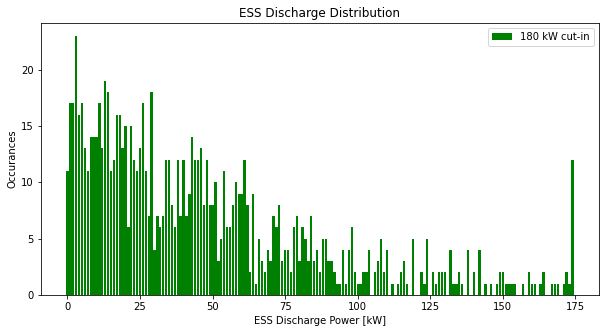

In [105]:
battery = ESS_p['180']
discharge = []
charge = []

for i in range(len(battery)):
    if battery[i] < 0:
        charge.append(battery[i])
    elif battery[i] > 0:
        discharge.append(battery[i])
        
a = [round(num,0) for num in discharge]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names = list(aa.keys())
times = list(aa.values())

plt.figure(figsize = (10,5))
plt.bar(names, times, label = '180 kW cut-in', color = 'g')
plt.title('ESS Discharge Distribution')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')
plt.legend()


In [118]:
ESS_p[u]

,100,110,120,130,140,150,160,170,180,190,...,210,220,230,240,250,260,270,280,290,300
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


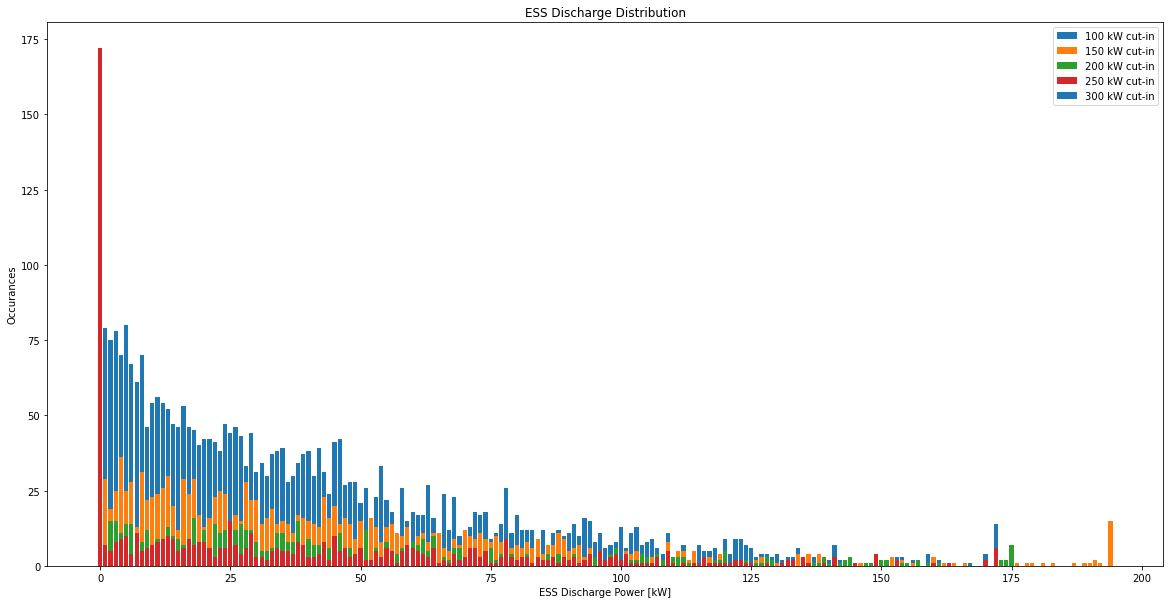

In [131]:
battery_1 = ESS_p['100']
battery_2 = ESS_p['150']
battery_3 = ESS_p['200']
battery_4 = ESS_p['250']
battery_5 = ESS_p['300']


discharge_1 = []
charge_1 = []
discharge_2 = []
charge_2 = []
discharge_3 = []
charge_3 = []
discharge_4 = []
charge_4 = []
discharge_5 = []
charge_5 = []

for i in range(len(battery_1)):
    if battery_1[i] < 0:
        charge_1.append(battery_1[i])
    elif battery_1[i] > 0:
        discharge_1.append(battery_1[i])
        
for i in range(len(battery_2)):
    if battery_2[i] < 0:
        charge_2.append(battery_2[i])
    elif battery_2[i] > 0:
        discharge_2.append(battery_2[i])
        
for i in range(len(battery_3)):
    if battery_3[i] < 0:
        charge_3.append(battery_3[i])
    elif battery_3[i] > 0:
        discharge_3.append(battery_3[i])
        
for i in range(len(battery_4)):
    if battery_4[i] < 0:
        charge_4.append(battery_4[i])
    elif battery_3[i] > 0:
        discharge_4.append(battery_4[i])
        
        
a = [round(num,0) for num in discharge_1]
#a = [round(num,0) for num in battery_1[u]]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names1 = list(aa.keys())
times1 = list(aa.values())

b = [round(num,0) for num in discharge_2]
bb = Counter(b)
bb = dict(bb)
names2 = list(bb.keys())
times2 = list(bb.values())

c = [round(num,0) for num in discharge_3]
cc = Counter(c)
cc = dict(cc)
names3 = list(cc.keys())
times3 = list(cc.values())

d = [round(num,0) for num in discharge_4]
dd = Counter(d)
dd = dict(dd)
names4 = list(dd.keys())
times4 = list(dd.values())

e = [round(num,0) for num in discharge_5]
ee = Counter(e)
ee = dict(ee)
names5 = list(ee.keys())
times5 = list(ee.values())



plt.figure(figsize = (20,10))
plt.bar(names1, times1, label = '100 kW cut-in')
plt.bar(names2, times2, label = '150 kW cut-in')
plt.bar(names3, times3, label = '200 kW cut-in')
plt.bar(names4, times4, label = '250 kW cut-in')
plt.bar(names5, times5, label = '300 kW cut-in')
plt.title('ESS Discharge Distribution')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')
plt.legend()

In [130]:
len(discharge_1)

3280

In [133]:
len(charge_1)

3214

In [138]:
cycles = []

for i in range(len(battery_1)):
    if i == 0:
        pass
    elif battery_1[i-1] >= 0 and battery_1[i] < 0:
        cycles.append(i)
    else:
        pass
print(len(cycles))

1068


In [139]:
cycles = []

for i in range(len(battery_3)):
    if i == 0:
        pass
    elif battery_3[i-1] >= 0 and battery_3[i] < 0:
        cycles.append(i)
    else:
        pass
print(len(cycles))

307
